# Clustering

## Overview

Clustering is about finding groups of related objects within instances. Consider the following example. 

<img src="images/clustering_general.png" alt="Example for Clustering" style="width: 500px;"/>

On the left side are a lot of smilies, which are objects. Clustering takes all these objects and separates them into groups. Above, we have two groups: one with happy smilies and one with sad smilies. The groups are created based on the features of the objects, no other information is used. To get a separation into happy and sad smilies, the features must reflect the emotion. If the features would, e.g., reflect the colors, the clustering algorithm would separate the smilies into yellow and orange smilies. If the features would reflect the degree of facial hair, the clustering algorithm would separate the smilies into those with no beard and those with a moustache. A bit more abstract, clustering can be described as follows. 

<img src="images/clustering_abstract.png" alt="Clustering in general" style="width: 500px;"/>

Thus, we just have objects, a clustering algorithm, and as a results we have groups of related objects. What we do not know without inspection of the clusters is what exactly the relationship between the objects in a group is. 

### The Formal Problem

Formally, we have a set of objects $O = \{object_1, object_2, ...\}$ that may be infinite. Moreover, we have representations of these objects in a feature space $\mathcal{F} = \{\phi(o): o \in O\}$. For clustering, the feature space is usually numeric, i.e., $\mathcal{F} \subseteq \mathbb{R}^d$. The grouping of the objects is described by a map $c: \mathcal{F} \to G$ with $G =\{1, ..., k\}$ and $k \in \mathbb{N}$ the number of clusters. 

### Measuring Similarity

Clusters are groups of *similar* objects. Consequently, the definition of similarity is central to clustering. The approach for clustering is simple: similar means that there is a short *distance* between objects in the feature space. There are different ways to measure distances, as any well-defined metric can be used. In the following, we present the three most commonly used metrics. 

#### Euclidean Distance

By far the the most common distance measure is the *euclidean distance*. The euclidean distance is the direct line between two points.

<img src="images/euclidean.png" alt="Euclidean Distance" style="width: 100px;"/>

The euclidean distance is based on the euclidean norm $||\cdot||_2$ and defined as
$$d(x,y) = ||y-x||_2 = \sqrt{(y_1-x_1)^2+...+(y_n-x_n)^2}.$$

#### Manhatten Distance

Another common distance measure is the *Manhatten distance*, also known as taxi-cab norm. The name of norm comes from the grid of the streets in Manhatten, that is mostly organized in an exis parallel way. Thus, if you want to travel between two points, you cannot use the diagonal.

<img src="images/manhatten.png" alt="Manhatten Distance" style="width: 100px;"/>

The manhatten distances is based on the Manhatten norm $||\cdot||_1$ and defined as
$$d(x,y) = ||y-x||_1 = |y_1-x_1|+...+|y_n-x_n|.$$

#### Chebyshev Distance

The *Chebyshev distance* is another common distance measure. The Chebyshev distance also known as maximum metric and  Chessboard distance. This is because the Chebychev distance is the same as the number of moves that the King in the game of chess needs to reach a certain field. 

<img src="images/chebyshev.png" alt="Chebyshev Distance" style="width: 100px;"/>

Thus, the value of the Chebychev norm is maximum of the distances in any direction. The Manhatten distances is based on the maximum norm $||\cdot||_\infty$ and defined as
$$d(x,y) = ||y-x||_\infty = \max_{i=1, ..., n} |y_1-x_1|.$$

### Evaluation of Clustering Results

The evaluation of clustering results is a bit different from the evaluation of the other categories of algorithms. The reason for this is that there are no generic criteria. Instead, the criteria depend on the clustering algorithm and the use case. 

Each clustering algorithm comes with its own approach for finding related objects, i.e., its own concept of similarity. Consequently, how good the clusters match the data, such that the data within the clusters is really similar to each other, depends on the definition of similarity used by the clustering algorithm. We will discuss such criteria together with algorithms. 

The importance of the use case can be seen using the emoticon example above. If we are interest in emotion, we have a perfect grouping. If we, on the other hand, want to identify emoticons from different sets of emoticons, the clusters should be the orange ones and the yellow ones. Unfortunately, such aspects cannot be measures by generic metrics. Instead, the data scientists, possibly together with domain experts, must analyze the meaning of the clusters in depth. Criteria for such a manual analysis may be if the number of clusters is reasonable, if the objects within a cluster seem similar to domain experts, or if all similar objects are within the same cluster. Unfortunately, such a manual analysis can be very difficult, espeically if the data is very large, there are many clusters, or the data has many different features and thus a high dimension. 

### Cities and Houses

We use a running analogy to explain the concepts behind the clustering algorithms. The analogy is quite simple: instead of objects, the analogy uses "houses", and instead of clusters, the analogy uses "cities". The anology works nicely, because you do not need to know to which city a house belongs and do not even need to know how many cities there are, to see if a houses belongs to the same city as other houses.  This is the same problem, we try to solve with clustering. We do not know to which cluster objects belong and how many clusters there are, but want to use an algorithm that can infer this for you. 

## $k$-Means Clustering

### General Idea

When we think about how we can define a cities, we may do so by using the town halls as reference points. A simple concept would be to say that each house belongs to the city, whose town hall is closest. This is the essence of the concept of the $k$-Means algorithm: we describe clusters by their *center*. These centers are also called *centroids* and $k$-means is an example for *centroid-based clustering*. 

If we want to know to which cluster an instance belongs, we just look for the closest center. The $k$ defines the number of clusters. Formally, we have cluster centers $C_1, ..., C_k \in \mathcal {F}$ and a distance metric $d$. We can determine the cluster of any instance $x \in \mathcal{F}$ as $$c(x) = argmin_{i=1,...,k} d(x, C_i).$$ The following figure visualizes how data is divided into $k=4$ clusters. The centers are shown by the large grey points, the colors indicate to which cluster each instance belongs. 

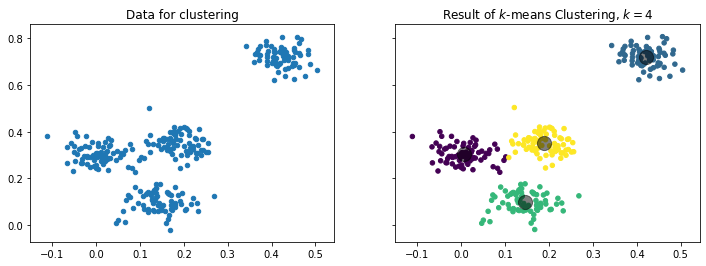

In [2]:
# we need matplotlib for plotting
import matplotlib.pyplot as plt
# we use sklearn to generate data and for the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate sample data, the _ means that we ignore the second return value
X, _ = make_blobs(n_samples=300, centers=4, center_box=(0, 1),
                  cluster_std=0.04, random_state=1)

# we fit a k-means model with four clusters
# then we predict for each point to which cluster it belong
# finally, we determine the location of the cluster centers
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# now we plot the data and the clustering results
f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
axes[0].set_title('Data for clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20)

axes[1].set_title('Result of $k$-means Clustering, $k=4$')
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

This concept is simple, effective, and also intuitive. 

### The Algorithm

The algorithm to determine the best location for the centers extends this concept. Consider that you have a city. The "best" location for the town hall would be such that the distances between the houses of the city and the town hall is minimized. Now imagine that a couple of new houses are built in the town, while some older ones are destroyed. This means that the location of the town hall should be changed, such that it minimizes the distances again. Of course, this does not happen in real-life, but the concept can be used to define the algorithm to determine the clusters with the $k$-means algorithm. 

Let $X \subset \mathcal{F}$ be our training data. We can determine clusters with $k$-Means as follows. 

1. Select initial centroids $C_1, ..., C_k \in \mathcal{F}$. 
2. Determine the clusters $X_i = \{x \in X: c(x) = i\}$ for $i=1,...,k$. 
3. Update centroid such that the location of the centroid is the arithmetic mean of the objects assigned to the clusters such that $C_i = \frac{1}{|X_i|} \sum_x \in X_i x$.
4. Repeat steps 2 and 3 until
  - Convergence, i.e., the clusters $X_i, i=1,...,k$ do no change anymore.
  - A predefined maximum number of iterations is reached.
  
While this may seem abstract, the concept becomes clear when we look at the visualization below. 

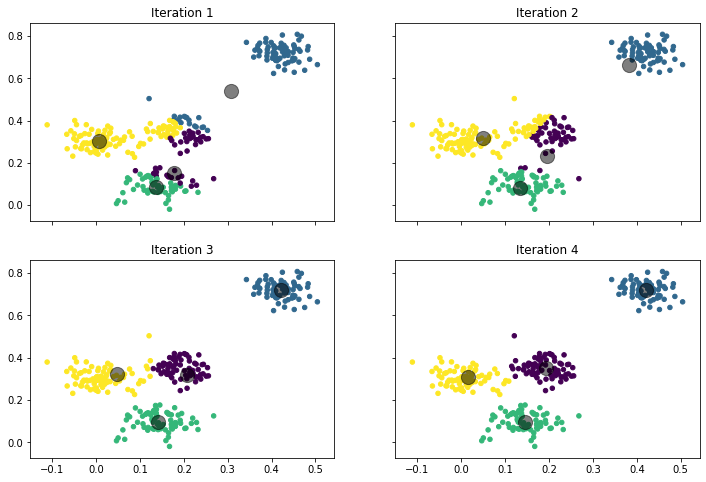

In [2]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

# run the algorithm with k=1,...,4 iterations to demonstrate how it converges
for iter in range(1,5):
    kmeans = KMeans(n_clusters=4,max_iter=iter, n_init=1, init='random', random_state=5)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    ax = axes[min(1,max(0, iter-2)), (iter-1)%2]
    ax.set_title('Iteration %i' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

This is what happens: 

- Iteration 1: Iteration 1 shows the starting position. We start with random cluster locations. On center is actually far away from any data point. The color indicates the initial cluster assignment. We can see that the top-right center gets all the instances in the top-right corner and some instances in the middle (teal). The leftmost center gets the points on the left side and some from the center (yellow). At the bottom-middle, we have two clusters close to each other who get split the points at the bottom (purple and green). Purple also get some points in from the middle. 
- Iteration 2: We update the cluster centers and they are moved to the location of the arithmetic mean of the cluster assignments in iteration 1. This means that the teal center moves to the top-right corner, because most points assigned to the cluster are from that area, only some points are from the middle. The teal center is still not located in the middle of the top-right cluster, because of the influence of the points from the middle on the update of the location. However, due to this update, no points from the middle are assigned to the teal cluster anymore. The interaction between yellow, purple, and green is quite interesting. The yellow center moves slightly to the right, because many points from the middle were assigned. The purple cluster moves a bit to the top, because of the points from the middle. The green center stays almost where it was. However, while yellow and purple both moved towards the middle, yellow actually as fewer points assigned, because the move of purple towards the middle was larger. Moreover, while green did not change, most of the bottom cluster is now green, because purple moved to the center. 
- Iteration 3: The result begins to converge. Teal is now in the center of the top-right cluster. Yellow starts to move towards the left side, because purple dominates the instances in the middle. As a consequence, green gains full control over the bottom cluster. 
- Iteration 4: After only four update cycles, we have almost the final result we have shown above. Teal, purple, and green do not move a lot anymore. Yellow is still moving to the left, but has now also almost reached the final destination. 

### Selecting $k$

In the example above, we always used $k=4$, i.e., four clusters. This is an imporant aspect of the $k$-Means algorithm: how to pick a suitable value for $k$? Before we explore this in greater detail, let us look at how the result with different values for $k$ for our sample data. 

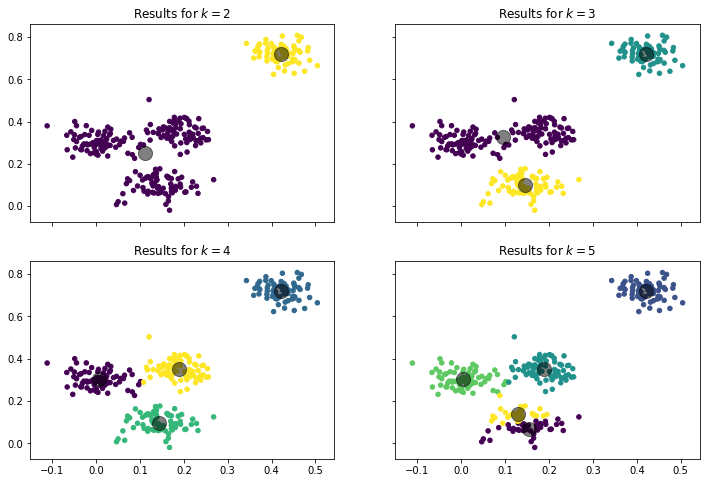

In [3]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

k = range(2,6)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    ax = axes[min(1,max(0, iter-3)), (iter)%2]
    ax.set_title('Results for $k=%i$' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

With $k=2$ we get a single large cluster and one smaller cluster. With $k=3$ the large cluster is split in two, and we have one cluster at the top-right, one at the bottom, and one in the middle of the plot. With $k=4$ the middle cluster is further split into two and we have one in the middle of the plot and one an the right side. With $k=5$ the bottom cluster is also split in two and now has a top and a bottom half. We can argue that the results for $k=2, 3, 4$ all make sense. We could argue that $k=2$ is best, because there is a large gap between the instances on the top-left and the others, and there is no other gap that large. We could also say that $k=3$ is best, because there is a small gap between the bottom cluster and the points in the middle, and there is no such gap between the points in the middle. We could also say that $k=4$ is best, because here all clusters are roughly equally dense and have a similar shape. However, for $k=5$, we cannot really argue that this would be best. The split of the group at the bottom just does not make sense. 

This is a general observation for clustering: without knowing the meaning of instances, we cannot really say which result is best, because often mutliple results may make sense. Which is best depends on the use case and the data. In general, there are several aspects that influence the selection of $k$. 

- The domain knowledge about the use case and the data. Knowledge about the domain can, e.g., help to determine is data within a cluster is really similar and also if different clusters are really not similar to each other. If you determine based on domain knowledge that clusters are not yet internally similar, you need to increase $k$. If you determine that similar objects are in different clusters, you should decrease $k$. The use case may also prescribe a fixed number of clusters that must be the outcome. For example, if a binary separation of the data into two groups must be achieved, $k$ must be set to two. 
- Visualizations are a great tool to see how clear the separation, how big the gaps between clusters are, and how the data in the clusters is spread out. Visualization is the means for identifying good values of $k$ we used above. 
- There is also a more analytical approach for the selection of $k$ based on the *Within-Sum-of-Squares* (WSS). To understand WSS, we must revisit the algorithm of $k$-Means. The update step sets the centers such that they are located at the arithmetic mean of the cluster points. Thus, the update step minimizes the *intra-cluster variance*. The variance is the square of the standard deviation and calculated by the dividing the sum of the squared distances from the arithmetic mean, divided by the number of instances in the cluster. Since the arithmetic mean is our center, the variance of the instances in a cluster is the sum of the squared distances from the center, divided by the number of instances in the cluster. Thus, the update step of $k$-means actually minimizes the *sum of squared* distances *within* a cluster. Based on this, WSS more or less measures how good $k$-means is at minimizing the intra-cluster variance by computing the squared distances of each instance from the respective cluster center: 
$$WSS = \sum_{i=1}^k\sum_{x \in X_i} d(x, C_i)^2$$

We already discussed how good the different values of $k$ are based on visualization. There is no domain knowledge we could use for randomly generated data. What is missing is an evaluation of the WSS of the example. The plot below shows the WSS for $k=2, ..., 5$. 

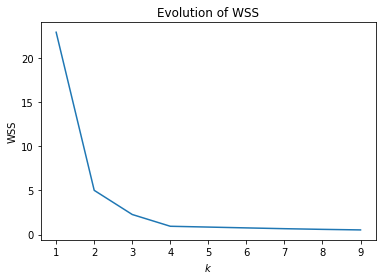

In [5]:
inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

We can see that there is strong decrease in the WSS from 2 to 3 and 3 to 4. There is almost no decrease for values larger than 4. We see that the slope of the WSS changes at both 2, 3, 4. Such changes in slope are called *elbows*, because they look a bit like a an arm bent at the elbow. Elbows are the interesting values of $k$. Thus, from the WSS the values $k=2, 3, 4$ would all be reasonable. For $k>4$ the WSS does not decrease a lot anymore and there are no elbows which means that there is no improvements and these are not good values. 

The WSS is monotonic-decreasing in $k$. This means that $WSS(k+1) \leq WSS(k)$ for all $k>1$. Consequently, we cannot just pick the minimum, as this would just be the number of instances, i.e., $k=|X|$. The reason for this is, that the variance is always decreasing if we add more centers. This is minimal if $d(x, C_{c(x)})=0$ for all $x \in X$, which can only be achieved with |X| clusters, assuming that there are no duplicate values in $X$. However, if the variance is already small, the decrease will be small, possibly even zero. This is what we observe for $k>4$ in our example. Thus, we can easily determine reasonable values of $k$ visually, but not automatically by minimizing $k$. 

### Problems of $k$-Means

Even though the concept of $k$-Means is simple, the algorithm often works well. However, there are several problems with $k$-Means that you should be aware of. 

- $k$-Means is sensitive to the initial clusters. The results may not be stable and change with different start centers. Consequently, $k$-Means should be run with multiple randomized start centers. If the results are unstable, this is a strong indicator that the outcome may not be good for the given number of clusters $k$. 
- An unsuitable value of $k$ may lead to bad results. Since $k$ must be picked manually, this means that experience is important when using the $k$-Means algorithm, to avoid bad results due to a wrong number of clusters. 
- All features must have a similar range of values, ideally even the same range of values. Otherwise, differences in the ranges of the scales may introduce articial weights between features. For example, consider data with two features: age in years and the yearly income in Euro. The age is (roughly) between 0 and 100, the income in Euro is - even for low paying jobs, already at 12*400=4,800 Euro, but can also easily be above 50,000 Euro. This means that, when we calcualte the distance between two instance, the age is irrelevant, all that matters is the income. Thus, the large range of the income scale means that the income as a higher weight and a stronger influence on the results. 
- Because the cluster assignment is based on the distance, clusters tend to be round. Clusters that are not roughly round can often not be described well by centroids. An example are the half-moons below. We can clearly see that there are two half-circles that each are one cluster. $k$-Means cannot find these clusters, because they are not round. 

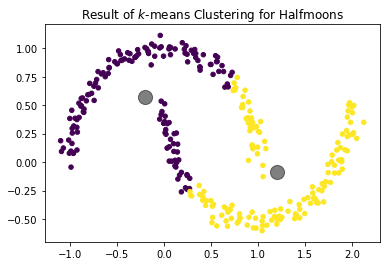

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons
from sklearn.cluster import KMeans

# this generates our halfmoon data
X,_ = make_moons(n_samples=300, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.figure()
plt.title('Result of $k$-means Clustering for Halfmoons')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

## EM Clustering

### General Idea

Another way to look at cities and houses is to think of them as random variables. The assignment of houses to cities is then guided by probability distributions. This is an extension of the idea behind $k$-Means. Our town hall is still the same, i.e., the center. However, we acknowledge that houses closer to the town hall are more likely to belong the the city than houses that are farther away. We actually go one step further and define cities not only based on the location of the town hall, but also by the variability of the houses, i.e., how spread out the houses of the cities are. This concept is called *distribution-based clustering*. 

Formally, we have a number of clusters $k$ that are described by random variables $C_1, ..., C_k$. We can calculate the probability that an instance belongs to a cluster $P(C_i = x), i=1,...,k$. Each instance is assigned to the *most likely* cluster, i.e., the cluster $C_i$ where the $P(C_i = x)$ is maximized. Consequently, our clustering is defined as 
$$c(x) = \max_{i=1,..., k} P(C_i = x).$$

While this concepts work in general with any probability distribution, we only use normally distributed random variables to describe the clusters in the following. This is also known as *Gaussian Mixture Model*. Please note that these normal distributions are multivariate, i.e., not just for one dimension, but for as many dimensions as we have features. A univariate normal distribution is described by the mean value and the standard deviation. In comparison, a multivariate normal distribution is described by a vector of mean values and a *covariance matrix*. The covariances describe the relationship between the variances in the different dimensions. A bit simplified, you can think of the covariances as the stretching of the bell-shape of the normal distribution in the different directions. Mathematically, the covariances describe an ellipse. One aspect that is important for us that the covariance matrix is square matrix. Thus, if we have $d$ features, there are $d+d^2$ parameters that describe the multivariate normal distribution, $d$ mean values and a $d\times d$ covariance matrix. This means that we have $k(d+d^2)$ parameters when we want to describe $k$ clusters. 

The following figure shows an example for the result of EM clustering with $k=4$ normal distributions fit to the same data we already used to show how $k$-Means works. The mean values are shown by the large gray points, the covariances by the colored ellipses. 

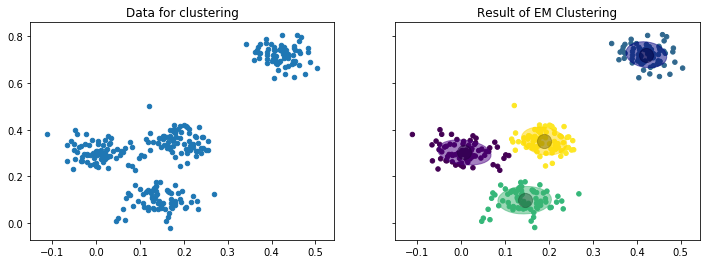

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

colors = ['indigo', 'navy', 'mediumseagreen', 'gold']

rs = 2

X, y_true = make_blobs(n_samples=300, centers=4, center_box=(0,1),
                       cluster_std=0.04, random_state=1)


em = GaussianMixture(n_components=4,random_state=rs)
em.fit(X)
y_em = em.predict(X)
centers = em.means_

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

axes[0].set_title('Data for clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20);

axes[1].set_title('Result of EM Clustering')
axes[1].scatter(X[:, 0], X[:, 1], c=y_em, s=20)
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
ax = axes[1]
for n, color in enumerate(colors):
    v, w = np.linalg.eigh(em.covariances_[n][:2,:2])
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(em.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
plt.show()

While the concept of clustering with random variables as clusters is a bit more complex, the figure already shows the advantage: because we do not just have the mean value, but also the covariances, the clusters also describe how they are *spread*. Thus, we have more information about the data encoded in the cluster. 

### The Algorithm

This type of clustering has is called EM clustering because of the algorithm used to determine the parameters of the clusters is called the *Expectation-Maximization algorithm*. The algorithm is in general similar to the $k$-Means algorithm we already know: we start with randomly initialized clusters and then iteratively update the clusters to better match the data. For the EM algorithm, the initialization means random mean values and random covariance matrices. Updates mean that the mean values and covariances are updated such that the *likelihood* that the data can be explained by the clusters is increased. We do not discuss the complete mathematical description of the EM algorithm, but rather look at a simplified version, where we update only the mean values and ignore the updates of the covariances. 

1. Randomly select initial normal distributions $C_1 \sim (\mu_1, \Sigma_1), ..., C_k \sim (\mu_k, \Sigma_k)$ with $\mu_i \in \mathcal{F}$ the mean values and $\Sigma_i \in \mathcal{F}\times\mathcal{F}$ the covariance matrices.
2. Expectation Step: Determine weights $$w_i(x) = \frac{p(x|\mu_i, \Sigma_i)}{\sum_{j=1}^k p(x|\mu_j, \Sigma_j)}$$ for all $x \in X$. 
3. Maximization Step: Update mean values as
$$\mu_i = \frac{1}{|X|}\sum_{x \in X} w_i(x)\cdot x$$
4. Repeat steps 2 and 3 until
  - Convergence, i.e., the clusters $C_i, i=1,...,k$  do no change anymore.
  - A predefined maximum number of iterations is reached.

The biggest difference between the EM algorithm and the $k$-Means algorithm are the weights. The weights specify the likelihood that and instance $x \in X$ belongs the a specific cluster. For example, if $w_i(x)=0.9$ it means that the likelihood is that $x$ belongs to cluster $C_i$ is 90%. The cluster assignment follows the same rule as above, i.e., $x$ is assigned to the cluster with that maximizes the weight $c(x) = max_{i=1, ..., k} w_i(x)$. Still, EM also allows insights if points are uncertain, i.e., multiple clusters have similar likelihoods. This is called *soft clustering*, because theoretically each point does not belong to a single cluster, but to all clusters with a certain likelihood. 

To better understand how the EM algorithm works, we again look at how the update steps work to fit the data.

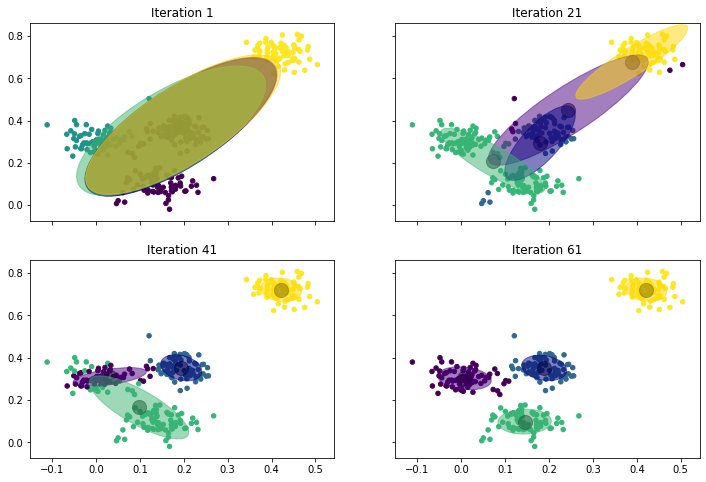

In [32]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

for iter in range(0,4):
    cur_iter = iter*20+1
    em = GaussianMixture(n_components=4,random_state=rs+3, max_iter=cur_iter, init_params='random')
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    ax = axes[min(1,max(0, iter-1)), (iter)%2]
    ax.set_title('Iteration %i' % cur_iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_em, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    for n, color in enumerate(colors):
        v, w = np.linalg.eigh(em.covariances_[n][:2,:2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(em.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
plt.show()

This is what happens:

- Iteration 1: We start with four normal distributions that are almost the same. The mean values are in the middle of the data, the covariances are ellipses that elongated in the diagonal, but slightly different. For example, we can see that the green covariance ellipse goes a bit more to the bottom left, and that the yellow one goes a bit more to the top right. This already shows in the assignment of the instances to the clusters: the instances in the top-right corner belong to the yellow cluster, the instances on the left side belong to the green cluster. The other two clusters are not really visible due to the overlap. 
- Iteration 21: After 21 iterations we see that the four normal distributions start to drift apart. The yellow one is pulled into the top-right corner, but still has a large covariance ellipse. The green one actually is "torn" between the instances on the left and the instances at the bottom. The blue one is in the middle with a relatively small covariance. The small covariance is an indicator that the blue cluster will not move strongly anymore and stay in the middle. The purple cluster is also in the middle, but still has a very large covariance, which means that it will likely still move elsewhere. 
- Iteration 41: The clusters begin to converge. The yellow cluster finished its journey to the top-left corner and now covers only that region. Similarly, the blue cluster covers the points in the middle. This pushed the purple cluster to the left side, where it is now residing with a considerably smaller covariance than in iteration 21. The green cluster is still torn between the left side and the bottom, but start to drift to the bottom, because purple now claims most of the left. 
- Iteration 61: The clusters converged. Purple now covers the instances on the left and green moved to the instances at the bottom.

In the above example we also see two important properties of EM clustering. First, the convergence is much slower than with $k$-Means. There are more parameters that must be optimized, i.e., not only the mean values but also the covariances. Additionally, the soft clustering means that instances belong to all clusters. This slows the movement of the mean values, because they get a (weak) pull from many instances, especially when the covariance is large. 

Second, we see that the clusters may cover disjoint regions. For example, in iteration 41, the green cluster contains the instances at the bottom, and some instances on the left side. Between these instances are purple instances, i.e., there are two disjoint regions of the green cluster. This is possible due to the shape of the covariances. Because green has a larger covariance, points that are farther away from the mean have a higher probability of being green than purple, because of the low covariance. This effect of disjoint regions is something that cannot be observed with many clustering algorithms. For example, this is impossible with $k$-Means, because distances change the same in all directions. 

### Selecting $k$

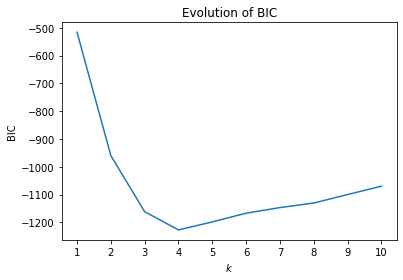

In [19]:
ks=range(1,11)
bic = []
for k in ks:
    em = GaussianMixture(n_components=k,random_state=rs)
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    bic.append(em.bic(X))

plt.figure()
plt.title("Evolution of BIC")
plt.plot(ks, bic)
plt.ylabel("BIC")
plt.xlabel("$k$")
plt.xticks(ks)
plt.show()

## DBSCAN

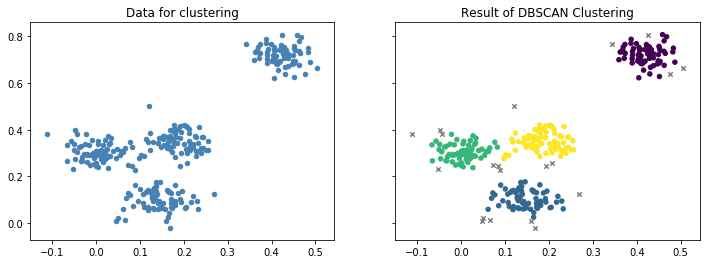

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN

rs = 2

X, y_true = make_blobs(n_samples=300, centers=4, center_box=(0,1),
                       cluster_std=0.04, random_state=1)


dbscan = DBSCAN(eps=0.03, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

axes[0].set_title('Data for clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20, c='steelblue');

axes[1].set_title('Result of DBSCAN Clustering')
axes[1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
plt.show()

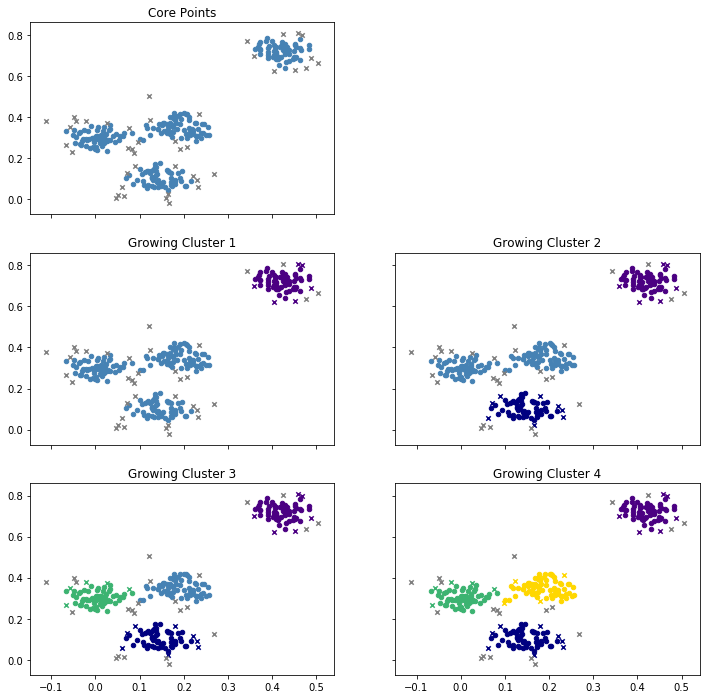

In [39]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

cluster_0_mask = dbscan.labels_==0
cluster_0_core_mask = cluster_0_mask & core_samples_mask
cluster_0_density_connected_mask = cluster_0_mask & ~core_samples_mask

cluster_1_mask = dbscan.labels_==1
cluster_1_core_mask = cluster_1_mask & core_samples_mask
cluster_1_density_connected_mask = cluster_1_mask & ~core_samples_mask

cluster_2_mask = dbscan.labels_==2
cluster_2_core_mask = cluster_2_mask & core_samples_mask
cluster_2_density_connected_mask = cluster_2_mask & ~core_samples_mask

cluster_3_mask = dbscan.labels_==3
cluster_3_core_mask = cluster_3_mask & core_samples_mask
cluster_3_density_connected_mask = cluster_3_mask & ~core_samples_mask

f, axes = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(12, 12))

ax = axes[0,0]
ax.set_title('Core Points')
ax.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~core_samples_mask, 0], X[~core_samples_mask, 1], s=20, marker='x', c='Grey')

axes[0,1].axis('off')

ax = axes[1,0]
ax.set_title('Growing Cluster 1')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[~cluster_0_mask & core_samples_mask, 0], X[~cluster_0_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[1,1]
ax.set_title('Growing Cluster 2')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[2,0]
ax.set_title('Growing Cluster 3')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[cluster_2_core_mask, 0], X[cluster_2_core_mask, 1], s=20, c=colors[2])
ax.scatter(X[cluster_2_density_connected_mask, 0], X[cluster_2_density_connected_mask, 1], s=20, c=colors[2], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[2,1]
ax.set_title('Growing Cluster 4')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[cluster_2_core_mask, 0], X[cluster_2_core_mask, 1], s=20, c=colors[2])
ax.scatter(X[cluster_2_density_connected_mask, 0], X[cluster_2_density_connected_mask, 1], s=20, c=colors[2], marker='x')
ax.scatter(X[cluster_3_core_mask, 0], X[cluster_3_core_mask, 1], s=20, c=colors[3])
ax.scatter(X[cluster_3_density_connected_mask, 0], X[cluster_3_density_connected_mask, 1], s=20, c=colors[3], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

plt.show()

## Single Linkage Clustering

## Comparison of the Clustering Algorithms